In [ ]:
# !export LC_ALL=en_US.UTF8

In [ ]:
import pandas as pd
import numpy as np

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

---------

## Reading

In [2]:
app_labels = pd.read_csv("data/app_labels.csv")
ga_train = pd.read_csv("data/gender_age_train.csv")
phones = pd.read_csv("data/phones.csv")
label_categories = pd.read_csv("data/label_categories.csv")

In [4]:
# events = pd.read_csv("data/events.csv")
# app_events = pd.read_csv("data/app_events.csv")

In [87]:
# sample_sub = pd.read_csv("data/sample_submission.csv")

------
### File descriptions

* `gender_age_train.csv`, `gender_age_train.csv` - the training and test set
    * `group`: this is the target variable you are going to predict
* **(maybe later)** `events.csv`, `app_events.csv` - when a user uses TalkingData SDK, the event gets logged in this data. Each event has an event id, location (lat/long), and the event corresponds to a list of apps in `app_events`.
    * `timestamp`: when the user is using an app with TalkingData SDK
* `app_labels.csv` - apps and their labels, the `label_id`'s can be used to join with `label_categories`
* `label_categories.csv` - apps' labels and their categories in text
* `phone_brand_device_model.csv` - device ids, brand, and models
    * `phone_brand`: note that the brands are in Chinese (**I've translated them**)
* **(nah)** `sample_submission.csv` - a sample submission file in the correct format

In [4]:
print(app_labels.shape)
app_labels.head()

(459943, 2)


,app_id,label_id
0,7324884708820027918,251
1,-4494216993218550286,251
2,6058196446775239644,406
3,6058196446775239644,407
4,8694625920731541625,406


In [ ]:
# print(app_events.shape)
# app_events.head()

In [5]:
print(ga_train.shape)
ga_train.head()

(74645, 4)


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [6]:
print(phones.shape)
phones.head()

(145291, 3)


,device_id,device_model,brand
0,-8890648629457979026,红米,xiaomi
1,1277779817574759137,MI 2,xiaomi
2,-3883532755183027260,MI 2S,xiaomi
3,-5827952925479472594,MI One Plus,xiaomi
4,-5776341595519925628,MI 2A,xiaomi


In [ ]:
# print(events.shape)
# events.head()

In [8]:
print(label_categories.shape)
label_categories.head()

(930, 2)


,label_id,category
0,1,NaN
1,2,game-game type
2,3,game-Game themes
3,4,game-Art Style
4,5,game-Leisure time


In [ ]:
# app_labels['app_id'] = [str(i) for i  in app_labels.app_id]
# app_labels['label_id'] = [str(i) for i  in app_labels.label_id]

# app_events['app_id'] = [str(i) for i  in app_events.app_id]
# app_events['event_id'] = [str(i) for i  in app_events.event_id]

# label_categories['label_id'] = [str(i) for i  in label_categories.label_id]
# ga_train['device_id'] = [str(i) for i  in ga_train.device_id]
# phones['device_id'] = [str(i) for i in phones.device_id]

# events['device_id'] = [str(i) for i in events.device_id]
# events['event_id'] = [str(i) for i in events.event_id]

---------

### Merging

In [9]:
df_apps = pd.merge(app_labels, label_categories)

In [10]:
df_people = pd.merge(phones, ga_train)

In [12]:
# df = pd.merge(df_apps, df_people)

In [5]:
# df_events = pd.merge(events, app_events)
# df = pd.merge(df, df_events)

---------

## Exploring

### `ga_train`

`ga_train` (`gender_age_train.csv`) - the training set
* `group`: this is the **target variable** you are going to predict

In [19]:
ga_train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


#### `ga_train` by `group`

In [57]:
group_counts = (ga_train['group']
                .value_counts()
                .reset_index(level=['group'])
                .rename_axis({'index': 'group', 'group':'count'}, axis=1))
print(group_counts)

     group  count
0   M23-26  10444
1     M22-   9502
2   M32-38   8518
3     M39+   7766
4   M29-31   6294
5     F23-   6270
6   M27-28   5380
7   F33-42   5093
8   F24-26   4593
9   F29-32   3928
10    F43+   3807
11  F27-28   3050


ValueError: could not convert string to float: 'M23-26'

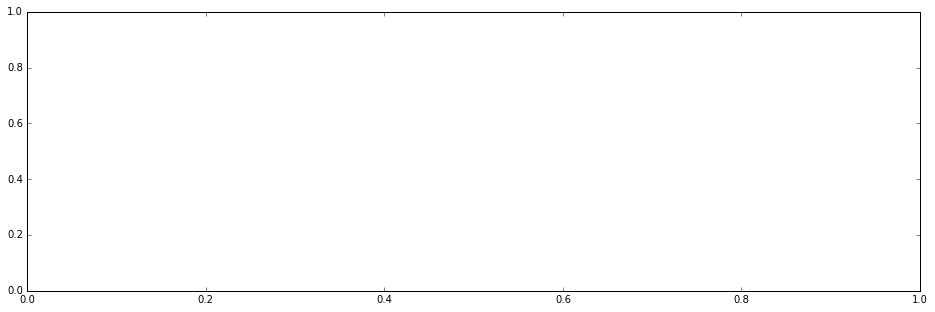

In [61]:
plt.figure(figsize = (16, 5))
plt.bar('group', data = group_counts, height=group_counts['count']);

#### `ga_train` by `gender`

In [21]:
gender_counts = ga_train['gender'].value_counts()#(normalize=True))
print(gender_counts.head(20))

M    47904
F    26741
Name: gender, dtype: int64


#### `ga_train` by `age`

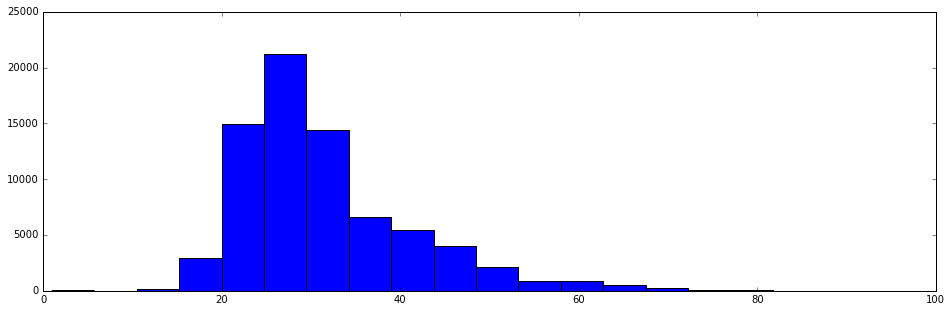

In [51]:
plt.figure(figsize = (16, 5))
plt.hist('age', data = ga_train, bins = 20);

In [49]:
age_counts = (ga_train['age']
              .value_counts()
              .reset_index(level=['age'])
              .rename_axis({'index': 'age', 'age':'count'}, axis=1))
              #.(normalize=True))
print(age_counts.head(20))
print(age_counts.tail(10))

TypeError: value_counts() got an unexpected keyword argument 'sorted'

------
### `phones`

In [24]:
phones.head()

,device_id,device_model,brand
0,-8890648629457979026,红米,xiaomi
1,1277779817574759137,MI 2,xiaomi
2,-3883532755183027260,MI 2S,xiaomi
3,-5827952925479472594,MI One Plus,xiaomi
4,-5776341595519925628,MI 2A,xiaomi


#### `phones` by `brand`

In [23]:
brand_counts = phones['brand'].value_counts()#(normalize=True))
print(brand_counts)

xiaomi      43210
sangsung    34286
huawei      32564
meizu       11853
coolpad      8407
Lenovo       6761
gionee       2768
ZTE          2096
sony         1821
Hisense       489
qiku          378
K-touch       376
koobee        165
opsson         59
konka          58
Name: brand, dtype: int64


#### `phones` by `device_model`

In [27]:
device_model_counts = phones['device_model'].value_counts()#(normalize=True))
print(device_model_counts.head(10))
print('\n')
print(device_model_counts.tail(10))

红米note           7358
MI 3             5712
MI 2S            5308
Galaxy Note 3    5019
MI 4             4798
Galaxy S4        4059
Galaxy Note 2    3993
荣耀6              3076
荣耀畅玩4X           2754
荣耀3C             2598
Name: device_model, dtype: int64


Tab2A7-20F      1
天机3             1
A269            1
GT-N8000        1
U960            1
Y210-2010       1
ivvi 小i Plus    1
N919D           1
U807N           1
7060S           1
Name: device_model, dtype: int64


### `df_apps`

In [71]:
print("\n================== df_apps\n======= by category")
categ_counts = df_apps['category'].value_counts()#(normalize=True))
print(categ_counts.head(20))


================== df_apps
======= by category
Industry tag                56902
Custom label                53936
Tencent                     49320
game                        48707
Property Industry 2.0       45697
1 free                      19083
Services 1                  11840
Property Industry new        9955
Relatives 1                  9027
Irritation / Fun 1           8831
Cards RPG                    7375
Casual puzzle categories     7052
Personal Effectiveness 1     5910
ARPG                         5306
Chess categories             5135
The elimination of class     5124
And the Church               4619
round                        3608
unknown                      2754
free                         2744
Name: category, dtype: int64


---------

## Splitting

In [ ]:
X = df.drop('group', axis=1)
y = df.group
print(X.shape)
print(y.shape)

In [36]:
from sklearn.cross_validation import train_test_split
(X_train, X_test, 
 y_train, y_test) = train_test_split(X, y, 
                                     test_size = 0.3, 
                                     random_state = 0)

              device_id gender  age   group phone_brand device_model
0  -8076087639492063270      M   35  M32-38          小米         MI 2
1  -2897161552818060146      M   35  M32-38          小米         MI 2
2  -8260683887967679142      M   35  M32-38          小米         MI 2
3  -4938849341048082022      M   30  M29-31          小米       红米note
4    245133531816851882      M   30  M29-31          小米         MI 3
(74839, 5)
(74839,)


In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'X3T'